### Perguntas de interesse

    1. Qual a eficiência dos tribunais ao longo dos anos? Ele subiu ou desceu?
    2. Qual a eficiência média dos tribunais?
    3. Em qual instância está o maior gargalo de tempo?
    4. Os tribunais com mais funcionário possuem mais efetividade?

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(15,5)

pd.set_option('display.max_colwidth', None) ## padrão é 50
pd.set_option('display.max_rows', None)

var_cnj = pd.read_csv("/Users/Lucas/Documents/Python-CNJ/Dados CNJ/Variaveis_27-Ago-2019.csv",sep=";", header=0,encoding = "Latin1")
base_cnj = pd.read_csv("/Users/Lucas/Documents/Python-CNJ/Dados CNJ/JN_27-Ago-2019.csv",sep=";", header=0,encoding = "Latin1")
base_cnj.head()

/Users/Lucas/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (32,66,84,96,153,289,416,520,737,836,902,905,915,916,917,919,920,988,997,998,1016,1046,1412,1417,1418,1419,1420,1421,1422,1423) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ano,justica,sigla,dsc_tribunal,uf_sede,uf_abrangida,seq_orgao,gt,pib,h1,...,ips_sus.fisc.penal,tcl_sus.fisc.penal,munic,areakm,comarca,varae,vara,je,varaje,varah
0,2009,Estadual,TJAC,TJ - Acre,AC,Norte,8,3519085437,8342355523,732793,...,"50,67691154","0,419721719",nd,nd,nd,nd,nd,nd,nd,nd
1,2009,Estadual,TJAL,TJ - Alagoas,AL,Nordeste,9,5050139540,27133037860,3120922,...,"44,91159513","0,783538195",nd,nd,nd,nd,nd,nd,nd,nd
2,2009,Estadual,TJAM,TJ - Amazonas,AM,Norte,10,8686970064,60877122684,3480937,...,"83,99604938","0,509146579",nd,nd,nd,nd,nd,nd,nd,nd
3,2009,Estadual,TJAP,TJ - Amapá,AP,Norte,11,2384328187,8237795351,668689,...,"93,30212766","0,524211486",nd,nd,nd,nd,nd,nd,nd,nd
4,2009,Estadual,TJBA,TJ - Bahia,BA,Nordeste,12,21374933566,"1,5442E+11",14021432,...,"64,13441936","0,691531043",nd,nd,nd,nd,nd,nd,nd,nd


In [96]:
var_cnj

,sigla,dsc_sigla
0,a1,A1 - Assistência Judiciária Gratuita em relação à Despesa Total da Justiça
1,a2,A2 - Assistência Judiciária Gratuita por 100.000 habitantes (R$)
2,a3,A3  Percentual de processos de justiça gratuita arquivados definitivamente
3,ag,Ag - Agravos de Recursos e Agravos do art. 557
4,ag2,Ag2º - Agravos de Recursos e Agravos do art. 557 de 2º Grau
5,agdda,AgDDA  Agravos às Decisões Denegatórias de Admissibilidade
6,ai2,AI2º - Agravos às Decisões Denegatórias de Admissibilidade de Recurso de Revista e Recurso Ordinário para o TST
7,ano,Ano
8,ap1,AP1º - Agravos de Petição
9,apublic,Apublic  Acórdãos Publicados


Antes de trabalhar com o banco de dados propriamente dito, irei selecionar as variáveis de interesse nesse relatório para que eu possa responder as perguntas propostas. 

Nessa análise decidi restringir a analise às varas da justiça estadual, que são as que cuidam de questões não relacionadas a trabalho e eleições.

In [97]:
var_usadas = ['ano','justica','sigla','munic','pib','mutil1','mutil2','uf_sede','uf_abrangida','porte','tbaix1','tbaix2'
              ,'mage1','mage2','ipm1','ipm2','k1','k2','pesus1','pesus2','procel1','procel2','reatc1','reat2'
              ,'reatextfisc1','sajudmag1','sajudmag2','scn1','scn2','tc1','tc2','tfaux1','tfaux2']

cnj = base_cnj[var_usadas]
var = var_cnj[var_cnj.sigla.isin(var_usadas)] ## criei esse dataframe apenas para eu poder consultar o que representa cada varíavel sem ter que procura-la enre todas as outras
cnj = cnj[cnj['justica']=='Estadual']

cnj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 856
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ano           280 non-null    int64 
 1   justica       280 non-null    object
 2   sigla         280 non-null    object
 3   munic         280 non-null    object
 4   pib           280 non-null    object
 5   mutil1        280 non-null    object
 6   mutil2        280 non-null    object
 7   uf_sede       280 non-null    object
 8   uf_abrangida  280 non-null    object
 9   porte         280 non-null    object
 10  tbaix1        280 non-null    object
 11  tbaix2        280 non-null    object
 12  mage1         280 non-null    object
 13  mage2         280 non-null    object
 14  ipm1          280 non-null    object
 15  ipm2          280 non-null    object
 16  k1            280 non-null    object
 17  k2            280 non-null    object
 18  pesus1        280 non-null    object
 19  pesus2  

In [98]:
var 

,sigla,dsc_sigla
7,ano,Ano
422,ipm1,IPM1º - Índice de Produtividade dos Magistrados no 1º Grau
423,ipm2,IPM2º - Índice de Produtividade dos Magistrados no 2º Grau
451,justica,Ramo de Justiça
453,k1,K1 - Carga de Trabalho dos Magistrados no 1º Grau
454,k2,K2º - Carga de Trabalho dos Magistrados no 2º Grau
491,mage1,MagE1º - Número de Cargos Existentes de Magistrado no 1º Grau
492,mage2,MagE2º - Número de Cargos Existentes de Magistrado no 2º Grau
529,munic,Número de municípios
531,mutil1,"m²Util1º - Área útil em metros quadrados no 1º Grau, Juizados Especiais e Turmas Recursais"


In [99]:
var_numerics = ['ano','munic','pib','mutil1','mutil2','tbaix1','tbaix2'
              ,'mage1','mage2','ipm1','ipm2','k1','k2','pesus1','pesus2','procel1','procel2','reatc1','reat2'
              ,'reatextfisc1','sajudmag1','sajudmag2','scn1','scn2','tc1','tc2','tfaux1','tfaux2']

cnj[var_numerics] = cnj[var_numerics].replace(to_replace="(,)",value=".",regex=True)
cnj[var_numerics] = cnj[var_numerics].apply(pd.to_numeric, errors='coerce')
cnj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 856
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ano           280 non-null    int64  
 1   justica       280 non-null    object 
 2   sigla         280 non-null    object 
 3   munic         140 non-null    float64
 4   pib           280 non-null    float64
 5   mutil1        165 non-null    float64
 6   mutil2        165 non-null    float64
 7   uf_sede       280 non-null    object 
 8   uf_abrangida  280 non-null    object 
 9   porte         280 non-null    object 
 10  tbaix1        280 non-null    int64  
 11  tbaix2        280 non-null    int64  
 12  mage1         280 non-null    int64  
 13  mage2         280 non-null    int64  
 14  ipm1          280 non-null    float64
 15  ipm2          280 non-null    float64
 16  k1            280 non-null    float64
 17  k2            280 non-null    float64
 18  pesus1        112 non-null    

In [110]:
cnj.describe()
len(cnj.sigla.unique())

28

In [101]:
prdt = cnj.groupby(['ano','sigla'])['ipm1','ipm2'].mean()

/Users/Lucas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [102]:
prdt['ipm1']

ano   sigla
2009  TJ       1374.680787
      TJAC      475.767857
      TJAL      544.465347
      TJAM     1003.504000
      TJAP     1067.327586
      TJBA      646.989655
      TJCE     1141.956113
      TJDFT     891.349282
      TJES      874.157025
      TJGO     1197.980328
      TJMA      553.539604
      TJMG     1288.507779
      TJMS     1602.993506
      TJMT      591.071429
      TJPA     1596.433476
      TJPB      611.605634
      TJPE     1016.944573
      TJPI      349.747475
      TJPR      644.362919
      TJRJ     2267.327434
      TJRN      570.396739
      TJRO      806.205128
      TJRR     1379.888889
      TJRS     1440.869718
      TJSC     1477.966867
      TJSE     1125.918699
      TJSP     2303.775799
      TJTO      744.767677
2010  TJ       1223.958885
      TJAC      703.425926
      TJAL     1251.133333
      TJAM      960.125000
      TJAP      307.069444
      TJBA     1132.623656
      TJCE      654.954407
      TJDFT    1131.010050
      TJES      

sigla
TJAC    AxesSubplot(0.08,0.07;0.87x0.81)
dtype: object

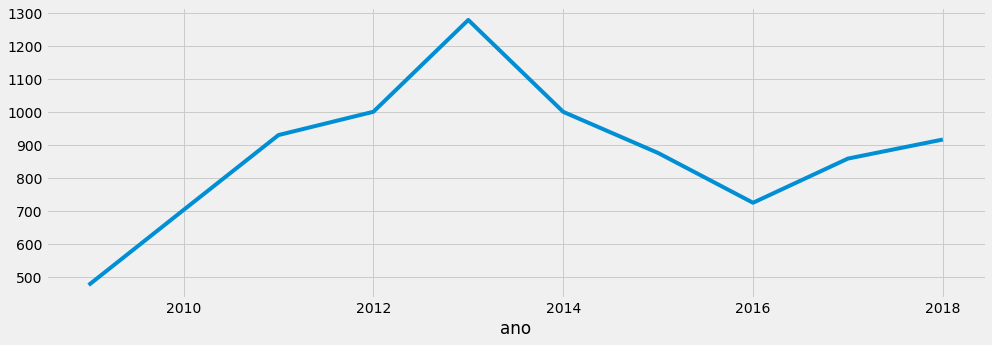

In [112]:
#prdt['ipm1'].plot(x='sigla',y='ipm1',subplots=True)
fig, ax = plt.subplots()
ax.set
cnj[cnj['sigla']=='TJAC'].groupby('sigla').plot(x='ano',y='ipm1',ax=ax,legend=False)

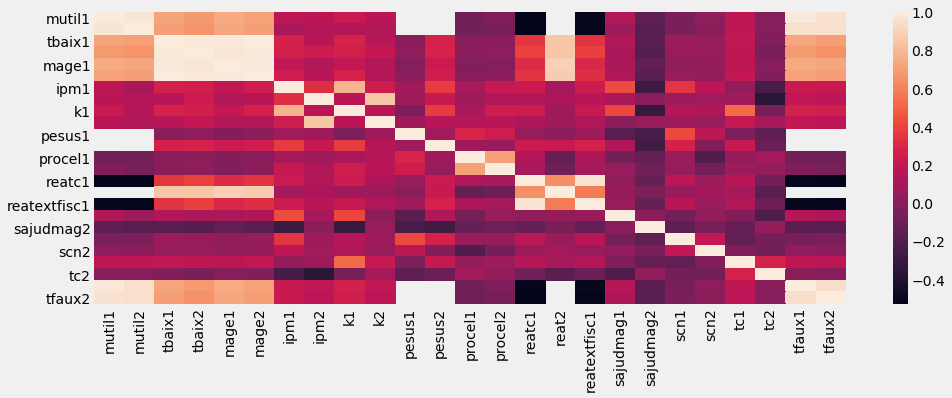

In [114]:
cor_var = ['mutil1','mutil2','tbaix1','tbaix2'
              ,'mage1','mage2','ipm1','ipm2','k1','k2','pesus1','pesus2','procel1','procel2','reatc1','reat2'
              ,'reatextfisc1','sajudmag1','sajudmag2','scn1','scn2','tc1','tc2','tfaux1','tfaux2']
corr = cnj[cor_var].corr()
sns.heatmap(corr)